In [1]:
# from data_download import *
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing as ppc
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
import os
import sys
module_path = os.path.abspath( os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)
from src import data_download

In [3]:
datadict = data_download.get_dataframes()
tables = data_download.get_tables(datadict)

Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Parcel.zip
    
Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip
    


/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2878: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
    


/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2878: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Lookup.zip
    


In [4]:
sales = datadict['rp_sale']
residences = datadict['res_bldg']
parcels = datadict['parcel']

In [5]:
ordinal = tables[0]
categorical = tables[1]

In [6]:
ordinal

,SalePrice,BrickStone,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,LotDepthFactor,TrafficNoise
0,550000,0,1,3.0,8,370,650,0,0,1560,0,0,0,0,240,0,0,200,2,1,0,1,0,1,0,0,1985,0,3,0,2500,0,0,0,0,0,0,0,0,0,0,0,0,0
1,648500,0,1,2.0,8,1390,0,0,0,3300,0,0,0,0,590,0,0,0,5,1,0,2,1,0,0,0,2005,0,3,6000,5250,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1445000,0,1,2.0,9,2150,0,0,0,4920,0,0,0,0,490,300,0,0,5,2,1,3,1,0,0,0,2018,0,3,0,5499,0,0,0,0,0,0,0,0,0,0,0,0,0
3,785000,0,1,2.0,8,580,0,0,0,1540,560,350,210,8,0,0,0,110,3,1,2,1,1,0,0,0,1998,0,3,0,1313,0,0,0,0,0,0,0,0,0,0,0,0,0
4,360000,0,1,1.0,7,1380,0,0,0,1380,0,0,0,0,480,100,0,230,3,0,0,2,0,0,0,0,1996,0,4,0,12200,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26101,669950,0,1,2.0,8,1193,0,0,0,2482,0,0,0,0,800,300,0,0,5,1,0,3,2,0,0,0,2018,0,3,0,11000,0,0,0,0,0,0,0,0,0,0,0,0,2
26102,1150000,0,1,1.5,7,1340,0,0,0,2910,850,850,0,7,0,0,0,140,4,0,1,1,0,1,0,0,1945,0,4,0,8360,0,0,0,0,0,0,0,0,0,0,0,0,0
26103,764500,25,1,1.0,8,1740,0,0,0,2900,1160,1160,0,7,0,230,0,0,4,1,0,1,0,1,0,1,1955,0,4,0,14889,0,0,0,0,0,0,0,0,0,0,0,0,0
26104,469000,0,1,2.0,9,1240,0,0,0,2420,0,0,0,0,510,40,0,0,4,1,0,2,0,1,0,0,1990,0,3,4610,6175,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Made SqFtPorch row in combo df
ordinal['SqFtPorch'] =(ordinal['SqFtEnclosedPorch'] + ordinal['SqFtOpenPorch'])


In [88]:
ordinal.head()

,SalePrice,BrickStone,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,LotDepthFactor,TrafficNoise,SqFtPorch,TotFloorPlan,PropLot
0,550000,0,1,3.0,8,370,650,0,0,1560,0,0,0,0,240,0,0,200,2,1,0,1,0,1,0,0,1985,0,3,0,2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,810,0.324000
1,648500,0,1,2.0,8,1390,0,0,0,3300,0,0,0,0,590,0,0,0,5,1,0,2,1,0,0,0,2005,0,3,6000,5250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1980,0.377143
2,1445000,0,1,2.0,9,2150,0,0,0,4920,0,0,0,0,490,300,0,0,5,2,1,3,1,0,0,0,2018,0,3,0,5499,0,0,0,0,0,0,0,0,0,0,0,0,0,300,2940,0.534643
3,785000,0,1,2.0,8,580,0,0,0,1540,560,350,210,8,0,0,0,110,3,1,2,1,1,0,0,0,1998,0,3,0,1313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,690,0.525514
4,360000,0,1,1.0,7,1380,0,0,0,1380,0,0,0,0,480,100,0,230,3,0,0,2,0,0,0,0,1996,0,4,0,12200,0,0,0,0,0,0,0,0,0,0,0,0,0,100,2190,0.179508


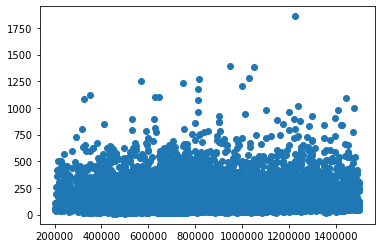

In [9]:
# Made SqFtPorch scatterplot to find linear correlation
porch = ordinal.loc[ordinal['SqFtPorch'] > 0, :]
plt.scatter(porch['SalePrice'], porch['SqFtPorch']);

In [10]:
# Made a sales vs. SqFtPorch correlation report
formula = 'SalePrice ~ SqFtPorch + SqFtDeck'
model = smf.ols(formula = formula, data = porch).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     319.6
Date:                Thu, 01 Oct 2020   Prob (F-statistic):          1.86e-136
Time:                        09:05:52   Log-Likelihood:            -1.9489e+05
No. Observations:               13942   AIC:                         3.898e+05
Df Residuals:                   13939   BIC:                         3.898e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.572e+05   3971.962    165.463      0.000    6.49e+05    6.65e+05
SqFtPorch    357.5754     19.568     18.274      0.000     319.220     395.931
SqFtDeck     226.8249     12.304     18.435      0.000     202.707     250.943
==============================================================================
Omnibus:                      771.643   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              875.272
Skew:                           0.599   Prob(JB):                    8.65e-191
Kurtosis:                       2.736   Cond. No.                         400.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Added TotFloorPlan column to check proportion of floor plan vs lot size
ordinal['TotFloorPlan'] = (ordinal['SqFtGarageAttached'] + ordinal['SqFtDeck'] + ordinal['SqFtPorch'] + ordinal['SqFt1stFloor'])

In [86]:
# Created proportion lot variable
ordinal['PropLot'] = ordinal['TotFloorPlan'] / ordinal['SqFtLot']

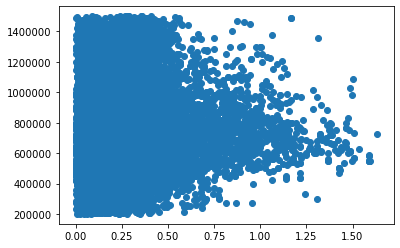

In [24]:
# Checked proportion lot correlation graph
plt.scatter(PropLot, ordinal['SalePrice']);

In [87]:
# Regression Report results
formula = 'SalePrice ~ PropLot'
model = smf.ols(formula = formula, data = ordinal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     473.4
Date:                Thu, 01 Oct 2020   Prob (F-statistic):          5.06e-104
Time:                        11:46:33   Log-Likelihood:            -3.5955e+05
No. Observations:               25780   AIC:                         7.191e+05
Df Residuals:                   25778   BIC:                         7.191e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.306e+05   2995.321    210.528      0.000    6.25e+05    6.36e+05
PropLot     2.007e+05   9224.654     21.758      0.000    1.83e+05    2.19e+05
==============================================================================
Omnibus:                     2251.563   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2898.443
Skew:                           0.820   Prob(JB):                         0.00
Kurtosis:                       3.106   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

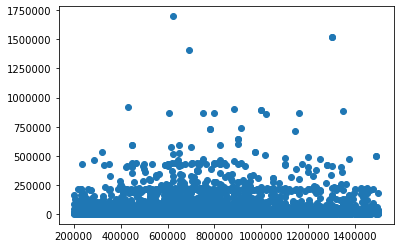

In [25]:
# Checked linearity of SqFtLot to SalePrice
normlot = ordinal[(ordinal['SqFtLot'] > 0) & (ordinal['SqFtLot'] <= 3000000)]
plt.scatter(normlot['SalePrice'], normlot['SqFtLot']);

In [26]:
correlations = ordinal.corr()['SalePrice']

In [27]:
high_corrs = correlations.sort_values(ascending = False).head(20)
low_corrs = correlations.sort_values(ascending = True).head(20)

In [18]:
high_corrs

SalePrice             1.000000
BldgGrade             0.563599
SqFtTotLiving         0.518041
Stories               0.289349
TotFloorPlan          0.288677
BathFullCount         0.280174
Bedrooms              0.258522
SqFt1stFloor          0.238252
SqFtOpenPorch         0.210726
SqFtPorch             0.204153
SqFtFinBasement       0.194504
SqFtTotBasement       0.191626
FinBasementGrade      0.180913
Territorial           0.177548
Bath3qtrCount         0.169849
SqFtDeck              0.163142
FpMultiStory          0.150429
BathHalfCount         0.144654
SqFtGarageAttached    0.133846
Olympics              0.122813
Name: SalePrice, dtype: float64

In [19]:
low_corrs

FpFreestanding        -0.068401
Condition             -0.067366
TrafficNoise          -0.009102
SqFtUnfinFull         -0.005678
SqFtEnclosedPorch     -0.000739
NbrLivingUnits         0.002149
MtRainier              0.002818
LotDepthFactor         0.012476
SqFtUnfinHalf          0.012824
SmallLakeRiverCreek    0.013080
WfntFootage            0.014000
OtherView              0.034963
SqFtLot                0.041981
YrRenovated            0.045018
SqFtGarageBasement     0.060636
FpAdditional           0.067314
BrickStone             0.071153
AddnlCost              0.073562
LakeSammamish          0.078007
Cascades               0.083490
Name: SalePrice, dtype: float64

In [85]:
formula = 'SalePrice ~ SqFtTotLiving + SqFtPorch + SqFtDeck'
model = smf.ols(formula = formula, data = ordinal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     3326.
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:44:56   Log-Likelihood:            -3.5556e+05
No. Observations:               25780   AIC:                         7.111e+05
Df Residuals:                   25776   BIC:                         7.112e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.177e+05   3992.973     79.561      0.000     3.1e+05    3.26e+05
SqFtTotLiving   166.0593      1.941     85.558      0.000     162.255     169.864
SqFtPorch        53.8369     13.984      3.850      0.000      26.427      81.247
SqFtDeck        148.1269      7.573     19.561      0.000     133.284     162.969
==============================================================================
Omnibus:                     1207.459   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1384.595
Skew:                           0.551   Prob(JB):                    2.18e-301
Kurtosis:                       3.272   Cond. No.                     6.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
from sklearn.feature_selection import RFE

lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=3)
select = select.fit(X = wine.drop('SalePrice', axis=1), y = wine['quality'])

select.support_

select.ranking_

NameError: name 'LinearRegression' is not defined

In [83]:
formula = 'SalePrice ~ SqFtTotLiving + SqFtPorch'
model = smf.ols(formula = formula, data = ordinal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     4728.
Date:                Thu, 01 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:44:25   Log-Likelihood:            -3.5575e+05
No. Observations:               25780   AIC:                         7.115e+05
Df Residuals:                   25777   BIC:                         7.115e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.261e+05   3998.752     81.562      0.000    3.18e+05    3.34e+05
SqFtTotLiving   172.3415      1.928     89.377      0.000     168.562     176.121
SqFtPorch        15.1646     13.946      1.087      0.277     -12.170      42.499
==============================================================================
Omnibus:                     1215.097   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1392.272
Skew:                           0.559   Prob(JB):                    4.70e-303
Kurtosis:                       3.218   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
categorical.head()

,SaleReason,PropertyClass,HeatSystem,HeatSource,PresentUse,HBUAsIfVacant,HBUAsImproved,WaterSystem,SewerSystem,Access,InadequateParking,StreetSurface,Topography,WfntLocation,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,PowerLines,OtherNuisances,AdjacentGolfFairway,AdjacentGreenbelt
0,1,8,4,3,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
1,1,8,5,2,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
2,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
3,1,8,1,2,29,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
4,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N


In [30]:
categorical['HBUAsImproved'].value_counts()

1    25352
0      251
2      166
4       11
Name: HBUAsImproved, dtype: int64

In [32]:
label_encoder = ppc.LabelEncoder()
status_labels = label_encoder.fit_transform(categorical["AdjacentGreenbelt"])
status_labels

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
label_encoder.classes_

array(['N', 'Y'], dtype=object)

In [ ]:


categorical["Status_Encoded"] = status_labels
categorical.drop('AdjacentGreenbelt', axis=1, inplace=False)

ohgreenbelt = smf.ols(formula = "SalePrice ~ SqFtTotLiving + SqFtPorch + Status_Encoded", exog = categorical)
ohgreenbelt_results = oh_greenbelt.fit()

ohgreenbelt_results.summary()

In [ ]:
categorical.head()

In [34]:
categorical['PropertyClass'].value_counts()

8    25314
7      454
1        6
9        3
2        2
3        1
Name: PropertyClass, dtype: int64

In [35]:
ohe = ppc.OneHotEncoder(sparse = False)

varsdf = pd.DataFrame(ohe.fit_transform(categorical[['PropertyClass']]),  index = categorical.index)
varsdf.columns = ['PropC' + str(pc) for pc in list(ohe.categories_[0])]
varsdf.drop('PropC1.0', axis= 1, inplace = True)
varsdf

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,PropC2.0,PropC3.0,PropC7.0,PropC8.0,PropC9.0
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
26101,0.0,0.0,0.0,1.0,0.0
26102,0.0,0.0,0.0,1.0,0.0
26103,0.0,0.0,0.0,1.0,0.0
26104,0.0,0.0,0.0,1.0,0.0


In [36]:
ohe.__dict__

{'categories': None,
 'sparse': False,
 'dtype': numpy.float64,
 'handle_unknown': 'error',
 'n_values': None,
 'categorical_features': None,
 'drop': None,
 '_n_values': 'auto',
 '_categories': None,
 '_categorical_features': 'all',
 '_legacy_mode': True,
 '_n_values_': array([10]),
 'categories_': [array([1., 2., 3., 7., 8., 9.])],
 '_feature_indices_': array([ 0, 10]),
 '_active_features_': array([1, 2, 3, 7, 8, 9])}

In [37]:
list(ohe.categories_[0])

[1.0, 2.0, 3.0, 7.0, 8.0, 9.0]

In [38]:
categorical['PropertyClass'].value_counts()

8    25314
7      454
1        6
9        3
2        2
3        1
Name: PropertyClass, dtype: int64

In [39]:
varsdf

,PropC2.0,PropC3.0,PropC7.0,PropC8.0,PropC9.0
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
26101,0.0,0.0,0.0,1.0,0.0
26102,0.0,0.0,0.0,1.0,0.0
26103,0.0,0.0,0.0,1.0,0.0
26104,0.0,0.0,0.0,1.0,0.0


In [40]:
categorical.head()

,SaleReason,PropertyClass,HeatSystem,HeatSource,PresentUse,HBUAsIfVacant,HBUAsImproved,WaterSystem,SewerSystem,Access,InadequateParking,StreetSurface,Topography,WfntLocation,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,PowerLines,OtherNuisances,AdjacentGolfFairway,AdjacentGreenbelt
0,1,8,4,3,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
1,1,8,5,2,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
2,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
3,1,8,1,2,29,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
4,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N


In [41]:
categorical[categorical['PropertyClass'] == 7].sample(10)

,SaleReason,PropertyClass,HeatSystem,HeatSource,PresentUse,HBUAsIfVacant,HBUAsImproved,WaterSystem,SewerSystem,Access,InadequateParking,StreetSurface,Topography,WfntLocation,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,PowerLines,OtherNuisances,AdjacentGolfFairway,AdjacentGreenbelt
5966,18,7,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
2943,18,7,5,2,300,1,0,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
10144,1,7,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
25444,1,7,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
110,1,7,5,2,29,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
24212,1,7,1,3,29,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,Y,N,N
25637,1,7,5,2,29,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
18892,1,7,5,2,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
865,18,7,1,2,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
5615,1,7,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N


In [42]:
ordinal

,SalePrice,BrickStone,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,LotDepthFactor,TrafficNoise,SqFtPorch,TotFloorPlan
0,550000,0,1,3.0,8,370,650,0,0,1560,0,0,0,0,240,0,0,200,2,1,0,1,0,1,0,0,1985,0,3,0,2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,810
1,648500,0,1,2.0,8,1390,0,0,0,3300,0,0,0,0,590,0,0,0,5,1,0,2,1,0,0,0,2005,0,3,6000,5250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1980
2,1445000,0,1,2.0,9,2150,0,0,0,4920,0,0,0,0,490,300,0,0,5,2,1,3,1,0,0,0,2018,0,3,0,5499,0,0,0,0,0,0,0,0,0,0,0,0,0,300,2940
3,785000,0,1,2.0,8,580,0,0,0,1540,560,350,210,8,0,0,0,110,3,1,2,1,1,0,0,0,1998,0,3,0,1313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,690
4,360000,0,1,1.0,7,1380,0,0,0,1380,0,0,0,0,480,100,0,230,3,0,0,2,0,0,0,0,1996,0,4,0,12200,0,0,0,0,0,0,0,0,0,0,0,0,0,100,2190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26101,669950,0,1,2.0,8,1193,0,0,0,2482,0,0,0,0,800,300,0,0,5,1,0,3,2,0,0,0,2018,0,3,0,11000,0,0,0,0,0,0,0,0,0,0,0,0,2,300,2293
26102,1150000,0,1,1.5,7,1340,0,0,0,2910,850,850,0,7,0,0,0,140,4,0,1,1,0,1,0,0,1945,0,4,0,8360,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1480
26103,764500,25,1,1.0,8,1740,0,0,0,2900,1160,1160,0,7,0,230,0,0,4,1,0,1,0,1,0,1,1955,0,4,0,14889,0,0,0,0,0,0,0,0,0,0,0,0,0,230,1970
26104,469000,0,1,2.0,9,1240,0,0,0,2420,0,0,0,0,510,40,0,0,4,1,0,2,0,1,0,0,1990,0,3,4610,6175,0,0,0,0,0,0,0,0,0,0,0,0,0,40,1790


In [43]:
prices = ordinal['SalePrice']

In [44]:
len(prices)

25780

In [46]:
property_classes = categorical[['PropertyClass']] 

In [47]:
len(property_classes)

25780

In [48]:
property_classes['SalePrice'] = prices

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


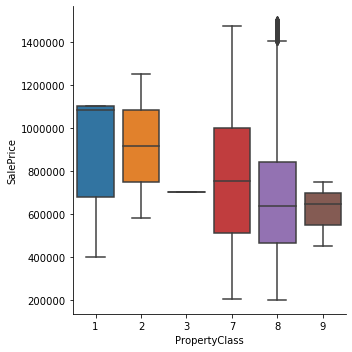

In [49]:

# ax.scatter(property_classes, prices, alpha= 0.2);
sns.catplot(x= 'PropertyClass', y= 'SalePrice', kind = 'box', data= property_classes);

In [51]:
property_classes[property_classes['PropertyClass']==7].mean()

PropertyClass         7.000000
SalePrice        768589.427313
dtype: float64

In [52]:
property_classes[property_classes['PropertyClass']==8].mean()

PropertyClass         8.000000
SalePrice        682401.651418
dtype: float64

In [53]:
heat_df = ordinal[['SalePrice']]

In [54]:
heat_df['HeatSystem'] = categorical['HeatSystem']

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
heat_df.head()

,SalePrice,HeatSystem
0,550000,4
1,648500,5
2,1445000,5
3,785000,1
4,360000,5


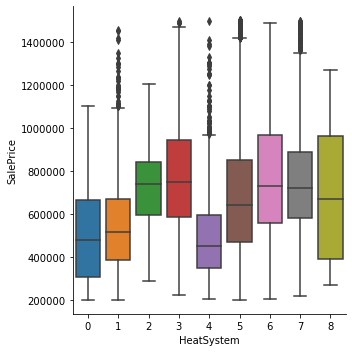

In [56]:
sns.catplot(x= 'HeatSystem', y= 'SalePrice', kind = 'box', data= heat_df);

In [64]:
heatsource_df = ordinal[['SalePrice']]

In [58]:
heatsource_df['HeatSource'] = categorical['HeatSource']

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


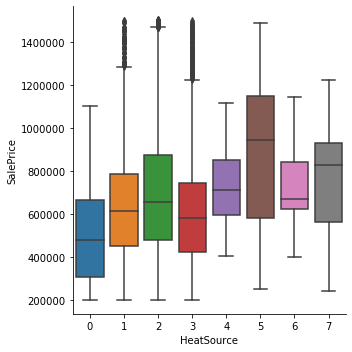

In [59]:
sns.catplot(x= 'HeatSource', y= 'SalePrice', kind = 'box', data= heatsource_df);

In [60]:
categorical.head()

,SaleReason,PropertyClass,HeatSystem,HeatSource,PresentUse,HBUAsIfVacant,HBUAsImproved,WaterSystem,SewerSystem,Access,InadequateParking,StreetSurface,Topography,WfntLocation,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,PowerLines,OtherNuisances,AdjacentGolfFairway,AdjacentGreenbelt
0,1,8,4,3,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
1,1,8,5,2,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
2,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
3,1,8,1,2,29,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
4,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N


In [61]:
HBUAsImproved_df = ordinal[['SalePrice']]

In [62]:
HBUAsImproved_df['HBUAsImproved'] = categorical['HBUAsImproved']

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


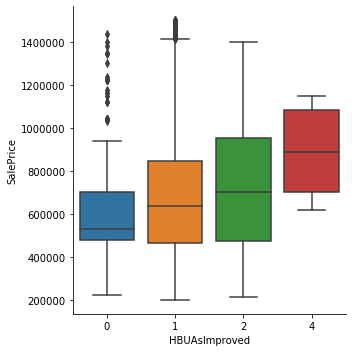

In [63]:
sns.catplot(x= 'HBUAsImproved', y= 'SalePrice', kind = 'box', data= HBUAsImproved_df);

In [126]:
ohe = ppc.OneHotEncoder(sparse = False)

OhHeatSource = pd.DataFrame(ohe.fit_transform(categorical[['HeatSource']]),  index = categorical.index)
OhHeatSource.columns = ['HSorc' + str(pc) for pc in list(ohe.categories_[0])]
OhHeatSource.drop('HSorc0.0', axis= 1, inplace = True)
OhHeatSource

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,HSorc1.0,HSorc2.0,HSorc3.0,HSorc4.0,HSorc5.0,HSorc6.0,HSorc7.0
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
26101,0.0,1.0,0.0,0.0,0.0,0.0,0.0
26102,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26103,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26104,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [77]:
OhHeatSource

,HSorc0.0,HSorc1.0,HSorc2.0,HSorc3.0,HSorc4.0,HSorc5.0,HSorc6.0,HSorc7.0
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26101,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
26102,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26103,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26104,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [90]:
categorical['HBUAsImproved'].value_counts()

1    25352
0      251
2      166
4       11
Name: HBUAsImproved, dtype: int64

In [117]:
categorical[categorical['HBUAsImproved'] == 1].mean()

SaleReason              1.770432
PropertyClass           7.984183
HeatSystem              4.999132
HeatSource              2.114705
PresentUse              5.200852
HBUAsIfVacant           1.067411
HBUAsImproved           1.000000
WaterSystem             1.970259
SewerSystem             1.859893
Access                  3.937480
InadequateParking       1.252485
StreetSurface           1.014161
Topography              0.072618
WfntLocation            0.072657
WfntBank                0.015462
WfntPoorQuality         0.000631
WfntRestrictedAccess    0.004733
TidelandShoreland       0.006548
dtype: float64

In [118]:
ohe = ppc.OneHotEncoder(sparse = False)

HBUAsImp = pd.DataFrame(ohe.fit_transform(categorical[['HBUAsImproved']]),  index = categorical.index)
HBUAsImp.columns = ['HBUA' + str(pc) for pc in list(ohe.categories_[0])]
HBUAsImp.drop('HBUA0.0', axis= 1, inplace = True)
HBUAsImp

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,HBUA1.0,HBUA2.0,HBUA4.0
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
26101,1.0,0.0,0.0
26102,1.0,0.0,0.0
26103,1.0,0.0,0.0
26104,1.0,0.0,0.0


In [99]:
categorical

,SaleReason,PropertyClass,HeatSystem,HeatSource,PresentUse,HBUAsIfVacant,HBUAsImproved,WaterSystem,SewerSystem,Access,InadequateParking,StreetSurface,Topography,WfntLocation,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,PowerLines,OtherNuisances,AdjacentGolfFairway,AdjacentGreenbelt
0,1,8,4,3,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
1,1,8,5,2,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
2,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
3,1,8,1,2,29,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
4,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26101,1,8,5,2,2,1,1,2,1,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
26102,1,8,5,1,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
26103,1,8,6,1,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
26104,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N


In [100]:
categorical['PresentUse'].value_counts()

2      22667
29      2676
300      256
6        181
Name: PresentUse, dtype: int64

In [124]:
categorical[categorical['PresentUse'] == 6].mean()

SaleReason              2.055249
PropertyClass           7.734807
HeatSystem              4.469613
HeatSource              2.060773
PresentUse              6.000000
HBUAsIfVacant           4.745856
HBUAsImproved           1.276243
WaterSystem             1.994475
SewerSystem             1.928177
Access                  3.939227
InadequateParking       1.546961
StreetSurface           1.016575
Topography              0.016575
WfntLocation            0.099448
WfntBank                0.044199
WfntPoorQuality         0.000000
WfntRestrictedAccess    0.022099
TidelandShoreland       0.044199
dtype: float64